# We are getting features for each players in order to forecast performance

In [31]:
import requests
import requests
import matplotlib.pyplot as plt

In [32]:
#getting id for premier league
url = "https://sofascore.p.rapidapi.com/tournaments/list"
querystring = {"categoryId":"1"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response_eng = requests.get(url, headers=headers, params=querystring)
data_eng = response_eng.json()

premier_league_id = None

for group in data_eng['groups']:
    for tournament in group['uniqueTournaments']:
        if tournament['name'] == "Premier League":
            premier_league_id = tournament['id']
print(f"Premier League ID: {premier_league_id}")


Premier League ID: 17


In [33]:
#building a dictionnary with our target players
url = "https://sofascore.p.rapidapi.com/tournaments/get-top-players"
querystring = {"tournamentId": premier_league_id, "seasonId": "61627"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
players = data['topPlayers']['rating']
#sort by rating
top_10_players = sorted(players, key=lambda x: x['statistics']['rating'], reverse=True)
#only forwards (attackers)
top_10_premier_league = [
    {
        "name": player['player']['name'],
        "rating": player['statistics']['rating'],
        "appearances": player['statistics']['appearances'],
        "team": player['team']['name'],
        "position": player['player']['position'],
        "id": player['player']['id']
    }
    for player in top_10_players if player['player']['position'] == 'F'
][:10]

print(top_10_premier_league)


[{'name': 'Mohamed Salah', 'rating': 7.99375, 'appearances': 16, 'team': 'Liverpool', 'position': 'F', 'id': 159665}, {'name': 'Bukayo Saka', 'rating': 7.93125, 'appearances': 16, 'team': 'Arsenal', 'position': 'F', 'id': 934235}, {'name': 'Matheus Cunha', 'rating': 7.6, 'appearances': 17, 'team': 'Wolverhampton', 'position': 'F', 'id': 886363}, {'name': 'Heung-min Son', 'rating': 7.5357142857143, 'appearances': 14, 'team': 'Tottenham Hotspur', 'position': 'F', 'id': 111505}, {'name': 'Bryan Mbeumo', 'rating': 7.5176470588235, 'appearances': 17, 'team': 'Brentford', 'position': 'F', 'id': 927083}, {'name': 'Alexander Isak', 'rating': 7.36, 'appearances': 15, 'team': 'Newcastle United', 'position': 'F', 'id': 823941}, {'name': 'Erling Haaland', 'rating': 7.3, 'appearances': 17, 'team': 'Manchester City', 'position': 'F', 'id': 839956}, {'name': 'Luis Díaz', 'rating': 7.225, 'appearances': 16, 'team': 'Liverpool', 'position': 'F', 'id': 883537}, {'name': 'Brennan Johnson', 'rating': 7.2,

# Let's visualise properties for one player (M. Salah)

In [34]:

#details
url = "https://sofascore.p.rapidapi.com/players/detail"
querystring = {"playerId":"159665"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'player': {'name': 'Mohamed Salah', 'slug': 'mohamed-salah', 'shortName': 'M. Salah', 'team': {'name': 'Liverpool', 'slug': 'liverpool', 'shortName': 'Liverpool', 'gender': 'M', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'tournament': {'name': 'Premier League', 'slug': 'premier-league', 'category': {'name': 'England', 'slug': 'england', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'id': 1, 'country': {'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'England', 'slug': 'england'}, 'flag': 'england', 'alpha2': 'EN'}, 'uniqueTournament': {'name': 'Premier League', 'slug': 'premier-league', 'primaryColorHex': '#3c1c5a', 'secondaryColorHex': '#f80158', 'category': {'name': 'England', 'slug': 'england', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'id': 1, 'country': {'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'England', 'slug': 'england'}, 'flag': 'england', 'alpha2': 'EN'}, 'userCount': 1377642, 'id': 17, 'country': {}, 'displayInverseHomeAwayTeams': F

In [35]:
#attributes
url = "https://sofascore.p.rapidapi.com/players/get-attribute-overviews"
querystring = {"playerId":"159665"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'averageAttributeOverviews': [{'attacking': 62, 'technical': 54, 'tactical': 44, 'defending': 32, 'creativity': 47, 'position': 'F', 'yearShift': 0, 'id': 19812}], 'playerAttributeOverviews': [{'attacking': 89, 'technical': 66, 'tactical': 60, 'defending': 28, 'creativity': 80, 'position': 'F', 'yearShift': 0, 'id': 11015}, {'attacking': 89, 'technical': 63, 'tactical': 60, 'defending': 24, 'creativity': 79, 'position': 'F', 'yearShift': 1, 'id': 11016}, {'attacking': 85, 'technical': 57, 'tactical': 61, 'defending': 23, 'creativity': 74, 'position': 'F', 'yearShift': 2, 'id': 11017}, {'attacking': 91, 'technical': 66, 'tactical': 66, 'defending': 26, 'creativity': 75, 'position': 'F', 'yearShift': 3, 'id': 11018}]}


In [36]:
url = "https://sofascore.p.rapidapi.com/players/get-last-ratings"
querystring = {"playerId":"159665", "tournamentId":"17", "seasonId":"61627"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()

last_ratings = data.get('lastRatings', [])
if last_ratings:
    #5 last games
    for i, rating_data in enumerate(last_ratings[:5]):
        match = rating_data.get('event', {})
        tournament = match.get('tournament', {}).get('name', 'N/A')
        home_team = match.get('homeTeam', {}).get('name', 'N/A')
        away_team = match.get('awayTeam', {}).get('name', 'N/A')
        rating = rating_data.get('rating', 'N/A')  
        home_score = match.get('homeScore', {}).get('current', 'N/A')
        away_score = match.get('awayScore', {}).get('current', 'N/A')
        match_id = match.get('id', 'N/A')
        print(f"\nMatch {i+1} (ID: {match_id}): {home_team} vs {away_team}")
        print(f"Tournament: {tournament}")
        print(f"Player's Rating: {rating}")
        print(f"Score: {home_team} {home_score} - {away_team} {away_score}")
else:
    print("No ratings found.")



Match 1 (ID: 12436471): Tottenham Hotspur vs Liverpool
Tournament: Premier League
Player's Rating: 9.4
Score: Tottenham Hotspur 3 - Liverpool 6

Match 2 (ID: 12436446): Liverpool vs Fulham
Tournament: Premier League
Player's Rating: 7.3
Score: Liverpool 2 - Fulham 2

Match 3 (ID: 12436978): Newcastle United vs Liverpool
Tournament: Premier League
Player's Rating: 9.1
Score: Newcastle United 3 - Liverpool 3

Match 4 (ID: 12436504): Liverpool vs Manchester City
Tournament: Premier League
Player's Rating: 7.9
Score: Liverpool 2 - Manchester City 0

Match 5 (ID: 12436506): Southampton vs Liverpool
Tournament: Premier League
Player's Rating: 8.2
Score: Southampton 2 - Liverpool 3


In [37]:
url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'player': {'name': 'Mohamed Salah', 'slug': 'mohamed-salah', 'shortName': 'M. Salah', 'position': 'F', 'jerseyNumber': '11', 'height': 175, 'userCount': 308755, 'id': 159665, 'marketValueCurrency': 'EUR', 'dateOfBirthTimestamp': 708566400, 'proposedMarketValueRaw': {'value': 53000000, 'currency': 'EUR'}, 'fieldTranslations': {'nameTranslation': {'ar': 'صلاح, محمد'}, 'shortNameTranslation': {'ar': 'م. صلاح'}}}, 'team': {'name': 'Liverpool', 'slug': 'liverpool', 'shortName': 'Liverpool', 'gender': 'M', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'userCount': 2469993, 'nameCode': 'LIV', 'disabled': False, 'national': False, 'type': 0, 'id': 44, 'entityType': 'team', 'teamColors': {'primary': '#cc0000', 'secondary': '#ffffff', 'text': '#ffffff'}, 'fieldTranslations': {'nameTranslation': {'ar': 'ليفربول', 'ru': 'Ливерпуль', 'hi': 'लिवरपूल'}, 'shortNameTranslation': {'ar': 'ليفربول', 'hi': 'लिवरपूल'}}}, 'statistics': {'totalPass': 14, 'accuratePass': 10, 'goalAssist': 2, 'to

In [38]:
#stats for salah for tottenham-liverpool
url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    player_info = data.get('player', {})
    player_stats = data.get('statistics', {})
    
    if player_info and player_stats:
        player_name = player_info.get('name', 'N/A')
        player_position = player_info.get('position', 'N/A')
        player_team = player_info.get('team', {}).get('name', 'N/A')
        player_jersey_number = player_info.get('jerseyNumber', 'N/A')
        goals = player_stats.get('goals', 0)
        goal_assists = player_stats.get('goalAssist', 0)
        shots_on_target = player_stats.get('onTargetScoringAttempt', 0)
        shots_off_target = player_stats.get('shotOffTarget', 0)
        big_chance_created = player_stats.get('bigChanceCreated', 0)
        big_chance_missed = player_stats.get('bigChanceMissed', 0)
        key_passes = player_stats.get('keyPass', 0)
        touches = player_stats.get('touches', 0)
        minutes_played = player_stats.get('minutesPlayed', 0)
        fouls_committed = player_stats.get('wasFouled', 0)
        duels_won = player_stats.get('duelWon', 0)
        duels_lost = player_stats.get('duelLost', 0)
        rating = player_stats.get('rating', 'N/A')
        expected_goals = player_stats.get('expectedGoals', 0)
        expected_assists = player_stats.get('expectedAssists', 0)
        
        #display
        print(f"  - Buts marqués: {goals}")
        print(f"  - Passes décisives: {goal_assists}")
        print(f"  - Tirs cadrés: {shots_on_target}")
        print(f"  - Tirs non cadrés: {shots_off_target}")
        print(f"  - Grosses occasions créées: {big_chance_created}")
        print(f"  - Grosses occasions manquées: {big_chance_missed}")
        print(f"  - Passes clés: {key_passes}")
        print(f"  - Touches de balle: {touches}")
        print(f"  - Minutes jouées: {minutes_played}")
        print(f"  - Fautes subies: {fouls_committed}")
        print(f"  - Duels gagnés: {duels_won}")
        print(f"  - Duels perdus: {duels_lost}")
        print(f"  - Note du joueur: {rating}")
        print(f"  - Attentes de buts (xG): {expected_goals}")
        print(f"  - Attentes de passes décisives (xA): {expected_assists}")
    else:
        print("Aucune statistique disponible pour ce joueur.")
else:
    print(f"Erreur: Impossible de récupérer les statistiques, code de statut {response.status_code}")


  - Buts marqués: 2
  - Passes décisives: 2
  - Tirs cadrés: 3
  - Tirs non cadrés: 2
  - Grosses occasions créées: 3
  - Grosses occasions manquées: 1
  - Passes clés: 3
  - Touches de balle: 32
  - Minutes jouées: 87
  - Fautes subies: 1
  - Duels gagnés: 2
  - Duels perdus: 6
  - Note du joueur: 9.4
  - Attentes de buts (xG): 2.3781
  - Attentes de passes décisives (xA): 0.143777


In [39]:
!pip install matplotlib seaborn numpy

{'heatmap': [{'x': 73, 'y': 49}, {'x': 86, 'y': 62}, {'x': 85, 'y': 62}, {'x': 87, 'y': 28}, {'x': 88, 'y': 29}, {'x': 95, 'y': 43}, {'x': 47, 'y': 18}, {'x': 90, 'y': 43}, {'x': 88, 'y': 40}, {'x': 90, 'y': 38}, {'x': 90, 'y': 36}, {'x': 80, 'y': 31}, {'x': 95, 'y': 25}, {'x': 94, 'y': 24}, {'x': 92, 'y': 29}, {'x': 75, 'y': 49}, {'x': 75, 'y': 27}, {'x': 79, 'y': 7}, {'x': 87, 'y': 26}, {'x': 96, 'y': 49}, {'x': 89, 'y': 27}, {'x': 78, 'y': 34}, {'x': 57, 'y': 5}, {'x': 90, 'y': 50}, {'x': 53, 'y': 6}, {'x': 47, 'y': 12}, {'x': 48, 'y': 10}, {'x': 54, 'y': 30}, {'x': 52, 'y': 26}, {'x': 78, 'y': 22}, {'x': 80, 'y': 25}, {'x': 78, 'y': 13}, {'x': 78, 'y': 33}]}


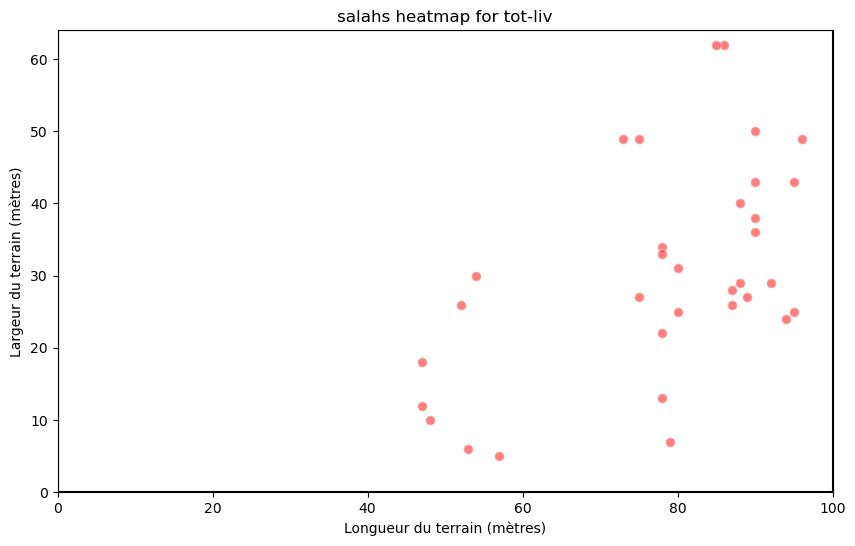

In [40]:
url = "https://sofascore.p.rapidapi.com/matches/get-player-heatmap"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
print(data)
heatmap_data = data["heatmap"]

x_coords = [point["x"] for point in heatmap_data]
y_coords = [point["y"] for point in heatmap_data]  

pitch_length = 100 
pitch_width = 64    

plt.figure(figsize=(10, 6))

plt.plot([0, 0], [0, pitch_width], color="black") 
plt.plot([pitch_length, pitch_length], [0, pitch_width], color="black")
plt.plot([0, pitch_length], [0, 0], color="black")  
plt.plot([0, pitch_length], [pitch_width, pitch_width], color="black")

plt.scatter(x_coords, y_coords, c='red', alpha=0.5, edgecolors="w", s=50)

plt.title("salahs heatmap for tot-liv")
plt.xlabel("Longueur du terrain (mètres)")
plt.ylabel("Largeur du terrain (mètres)")

plt.xlim(0, pitch_length)
plt.ylim(0, pitch_width)

plt.show()


# Let's all put it in a function so that it's easy to replicate the latter for other players

In [41]:
def get_ratings_player(player_id):
    url = "https://sofascore.p.rapidapi.com/players/get-last-ratings"
    querystring = {"playerId":player_id, "tournamentId":"17", "seasonId":"61627"}
    headers = {
        "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
        "x-rapidapi-host": "sofascore.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()

    last_ratings = data.get('lastRatings', [])
    five_last_games=[]
    if last_ratings:
        #5 last games
        for i, rating_data in enumerate(last_ratings[:5]):
            match = rating_data.get('event', {})
            tournament = match.get('tournament', {}).get('name', 'N/A')
            home_team = match.get('homeTeam', {}).get('name', 'N/A')
            away_team = match.get('awayTeam', {}).get('name', 'N/A')
            rating = rating_data.get('rating', 'N/A')  
            home_score = match.get('homeScore', {}).get('current', 'N/A')
            away_score = match.get('awayScore', {}).get('current', 'N/A')
            match_id = match.get('id', 'N/A')
            game=[match_id,home_team,away_team,home_score,away_score,rating]
            five_last_games.append(game)
    else:
        print("No ratings found.")
    return five_last_games

In [42]:
def get_heatmap(player_id, match_id):
    url = "https://sofascore.p.rapidapi.com/matches/get-player-heatmap"
    querystring = {"matchId": match_id, "playerId": player_id}
    headers = {
        "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
        "x-rapidapi-host": "sofascore.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()
    print(data)
    heatmap_data = data["heatmap"]

    x_coords = [point["x"] for point in heatmap_data]
    y_coords = [point["y"] for point in heatmap_data]  

    pitch_length = 100 
    pitch_width = 64    

    plt.figure(figsize=(10, 6))

    plt.plot([0, 0], [0, pitch_width], color="black") 
    plt.plot([pitch_length, pitch_length], [0, pitch_width], color="black")
    plt.plot([0, pitch_length], [0, 0], color="black")  
    plt.plot([0, pitch_length], [pitch_width, pitch_width], color="black")

    plt.scatter(x_coords, y_coords, c='red', alpha=0.5, edgecolors="w", s=50)

    plt.title("salahs heatmap for tot-liv")
    plt.xlabel("Longueur du terrain (mètres)")
    plt.ylabel("Largeur du terrain (mètres)")

    plt.xlim(0, pitch_length)
    plt.ylim(0, pitch_width)

    plt.show()

In [43]:
def get_stats_player(player_id, match_id):
    url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
    querystring = {"matchId": match_id, "playerId": player_id}
    headers = {
        "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
        "x-rapidapi-host": "sofascore.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        player_info = data.get('player', {})
        player_stats = data.get('statistics', {})

    stats=[]
        
    if player_info and player_stats:
        player_name = player_info.get('name', 'N/A')
        player_position = player_info.get('position', 'N/A')
        player_team = player_info.get('team', {}).get('name', 'N/A')
        player_jersey_number = player_info.get('jerseyNumber', 'N/A')
        goals = player_stats.get('goals', 0)
        goal_assists = player_stats.get('goalAssist', 0)
        shots_on_target = player_stats.get('onTargetScoringAttempt', 0)
        shots_off_target = player_stats.get('shotOffTarget', 0)
        big_chance_created = player_stats.get('bigChanceCreated', 0)
        big_chance_missed = player_stats.get('bigChanceMissed', 0)
        key_passes = player_stats.get('keyPass', 0)
        touches = player_stats.get('touches', 0)
        minutes_played = player_stats.get('minutesPlayed', 0)            
        fouls_committed = player_stats.get('wasFouled', 0)
        duels_won = player_stats.get('duelWon', 0)
        duels_lost = player_stats.get('duelLost', 0)
        rating = player_stats.get('rating', 'N/A')
        expected_goals = player_stats.get('expectedGoals', 0)
        expected_assists = player_stats.get('expectedAssists', 0)
        game_stats=[player_name, goals, goal_assists, shots_on_target, shots_off_target, big_chance_created, 
        big_chance_missed, key_passes, touches, duels_won, duels_lost, expected_goals, expected_assists]

        stats.append(game_stats)
    else:
        print(f"Erreur: Impossible de récupérer les statistiques, code de statut {response.status_code}")
    return stats

In [44]:
get_ratings_player(159665)

[[12436471, 'Tottenham Hotspur', 'Liverpool', 3, 6, 9.4],
 [12436446, 'Liverpool', 'Fulham', 2, 2, 7.3],
 [12436978, 'Newcastle United', 'Liverpool', 3, 3, 9.1],
 [12436504, 'Liverpool', 'Manchester City', 2, 0, 7.9],
 [12436506, 'Southampton', 'Liverpool', 2, 3, 8.2]]

In [45]:
get_stats_player(159665, 12436471)

[['Mohamed Salah', 2, 2, 3, 2, 3, 1, 3, 32, 2, 6, 2.3781, 0.143777]]

# Let's get to building our dataframe

In [46]:
import pandas as pd

In [58]:
def generate_player_stats_dataframe(player_id):
    last_games = get_ratings_player(player_id)
    
    player_stats_list = []
    
    for game in last_games:
        match_id, home_team, away_team, home_score, away_score, rating = game
        
        stats = get_stats_player(player_id, match_id)
        
        if stats:
            (player_name, goals, assists, shots_on_target, shots_off_target,
             big_chance_created, big_chance_missed, key_passes, touches,
             duels_won, duels_lost, expected_goals, expected_assists) = stats[0]
            
            player_stats_list.append({
                "Match ID": match_id,
                "Home Team": home_team,
                "Away Team": away_team,
                "Home Score": home_score,
                "Away Score": away_score,
                "Player Rating": rating,
                "Goals": goals,
                "Assists": assists,
                "Shots on Target": shots_on_target,
                "Shots off Target": shots_off_target,
                "Big Chances Created": big_chance_created,
                "Big Chances Missed": big_chance_missed,
                "Key Passes": key_passes,
                "Touches": touches,
                "Duels Won": duels_won,
                "Duels Lost": duels_lost,
                "xG": expected_goals,
                "xA": expected_assists
            })
    stats_df = pd.DataFrame(player_stats_list)
    return stats_df


In [59]:
#matheus cunha
generate_player_stats_dataframe(886363)


,Match ID,Home Team,Away Team,Home Score,Away Score,Player Rating,Goals,Assists,Shots on Target,Shots off Target,Big Chances Created,Big Chances Missed,Key Passes,Touches,Duels Won,Duels Lost,xG,xA
0,12436469,Leicester City,Wolverhampton,0,3,7.8,1,0,1,1,1,0,3,76,5,11,0.1539,0.306815
1,12436456,Wolverhampton,Ipswich Town,1,2,8.3,1,0,3,1,0,0,2,63,8,6,0.4084,0.122646
2,12436454,West Ham United,Wolverhampton,2,1,7.1,0,0,1,1,0,0,4,53,4,6,0.0440,0.246820
3,12436947,Everton,Wolverhampton,4,0,6.6,0,0,1,0,0,0,0,60,8,8,0.0928,0.014196
4,12436922,Wolverhampton,Bournemouth,2,4,6.5,0,0,0,1,0,0,2,50,5,6,0.1099,0.071339


In [60]:
#mo salah
generate_player_stats_dataframe(159665)

,Match ID,Home Team,Away Team,Home Score,Away Score,Player Rating,Goals,Assists,Shots on Target,Shots off Target,Big Chances Created,Big Chances Missed,Key Passes,Touches,Duels Won,Duels Lost,xG,xA
0,12436471,Tottenham Hotspur,Liverpool,3,6,9.4,2,2,3,2,3,1,3,32,2,6,2.3781,0.143777
1,12436446,Liverpool,Fulham,2,2,7.3,0,1,0,3,1,0,1,52,4,5,0.2210,0.369755
2,12436978,Newcastle United,Liverpool,3,3,9.1,2,1,2,1,0,0,3,50,2,5,0.6770,0.242431
3,12436504,Liverpool,Manchester City,2,0,7.9,1,1,1,2,1,1,1,29,3,4,1.3512,0.522646
4,12436506,Southampton,Liverpool,2,3,8.2,2,0,4,3,0,3,1,46,4,4,1.8619,0.159145


# There we go! We can now generate a statsheet for any player in the Prem given his ID code.